# TRAIN KERAS MODELS
## Convolutional Neural Networks
#### Luciano De Bortoli | Ingeniería de Sonido
<img src="logo.jpg" alt="Drawing" align="left" style="width: 300px;"/>

In [1]:
import keras
from ..scripts import tools
print("Libraries imported")

Using TensorFlow backend.
J:\Python\envs\tensorflow_env\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Keras Version:  2.2.4
Libraries imported


# DATASET
## Feature Extraction

In [2]:
tools.dataset_feature_extraction(
    source_dir      = "J:\\DataOffline\\Datasets\\SOUND_SCENES_AUDIO_HPF",
    destination_dir = "J:\\DataOffline\\Datasets\\SOUND_SCENES_MELSPECTROGRAM",
    feature_type    ='mel_specs'
)

destination_dir already exists


## Combinations

Total Size: 11388.24 MB


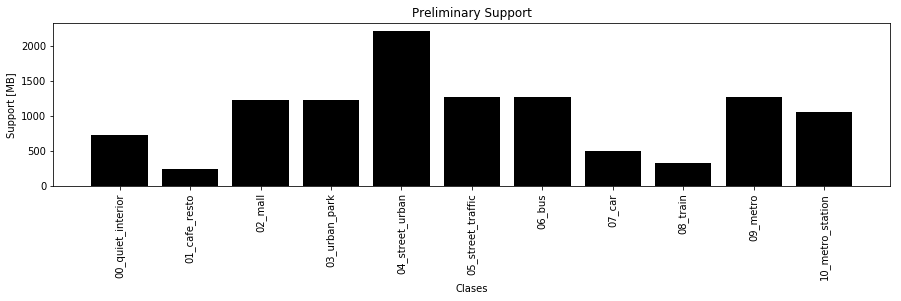

In [4]:
finalCombi = tools.Combination(
    source_path      = "J:\\DataOffline\\Datasets\\SOUND_SCENES_MELSPECTROGRAM",
    destination_path = "J:\\DataOffline\\Datasets\\COMBINATIONS\\COMBI_FINAL_MELSPECTROGRAM"
)
finalCombi.add("00_quiet_interior",   ["tut17_07_home","tut17_08_library","tut17_10_office"])
finalCombi.add("01_cafe_resto",       ["tut17_02_cafe"])
finalCombi.add("02_mall",             ["tut18_06_shopping_mall"])
finalCombi.add("03_urban_park" ,      ["tut18_04_park","tut17_05_forest_path","tut17_11_park"])
finalCombi.add("04_street_urban" ,    ["tut18_05_public_square","tut18_07_street_pedestrian"])
finalCombi.add("05_street_traffic",   ["tut18_08_street_traffic","tut17_04_city_center"])
finalCombi.add("06_bus",              ["tut18_01_bus","tut17_01_bus"])
finalCombi.add("07_car",              ["tut17_03_car"])
finalCombi.add("08_train",            ["tut17_13_train"])
finalCombi.add("09_metro",            ["tut18_03_metro"])
finalCombi.add("10_metro_station",    ["tut18_02_metro_station","tut17_09_metro_station"])
finalCombi.display_support()

In [5]:
finalCombi.generate()

destination_path already exists


In [2]:
train_dataset = tools.Dataset(
    name         = "COMBI_FINAL",
    features_dir = "J:\\DataOffline\\Datasets\\COMBINATIONS\\COMBI_FINAL_MELSPECTROGRAM",
    xy_dir       = "J:\\DataOffline\\Datasets\\TEMP_TRAIN",
)

COMBI_FINAL created!


In [ ]:
train_dataset.purge()

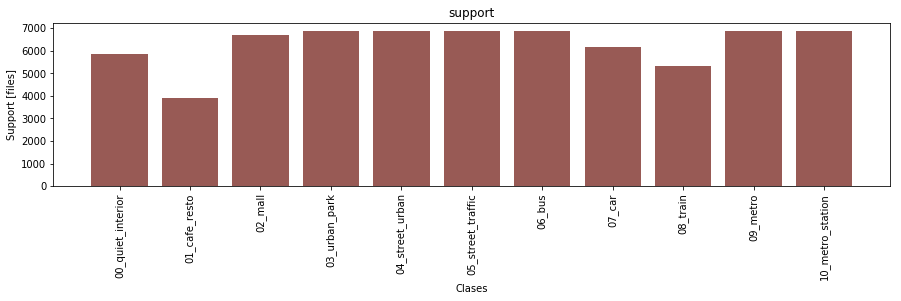

In [20]:
train_dataset.plot_support()

In [4]:
train_dataset.compile_XY(split=True,val_size=0.2,test_size=0.2)

Total Classes:   11
Dataset Compiled                                                                         


In [3]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = train_dataset.load_XY(is_split=True,normalize=True)

X_train: (41610, 128, 128, 1)
Y_train: (41610, 11)
X_val: (13870, 128, 128, 1)
Y_val: (13870, 11)
X_test: (13871, 128, 128, 1)
Y_test: (13871, 11)
Dataset Loaded.


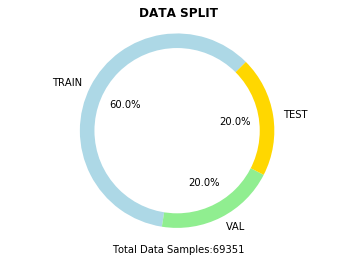

In [4]:
tools.plot_pie(sizes=[len(X_train),len(X_val),len(X_test)])

## Classifier Model

In [13]:
classifier = tools.Classifier(
    name   = "butter_DA",
    labels = train_dataset.labels
)

Classifier Created!


In [13]:
# BUILD MODEL (CNN)
classifier.model = keras.models.Sequential()

# LAYER 1:
classifier.model.add(keras.layers.BatchNormalization(input_shape=train_dataset.input_shape))
classifier.model.add(keras.layers.Conv2D(filters=24, kernel_size=(3, 3), padding="same"))
classifier.model.add(keras.layers.Activation('relu'))
classifier.model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# LAYER 2:
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Conv2D(filters=24, kernel_size=(3, 3), padding="same"))
classifier.model.add(keras.layers.Activation('relu'))
classifier.model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# LAYER 3:
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Conv2D(filters=48, kernel_size=(3, 3), padding="same"))
classifier.model.add(keras.layers.Activation('relu'))
classifier.model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# LAYER 4:
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Conv2D(filters=48, kernel_size=(2, 2), padding="same"))
classifier.model.add(keras.layers.Activation('relu'))
classifier.model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# LAYER 5:
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Conv2D(filters=48, kernel_size=(2, 2), padding="same"))
classifier.model.add(keras.layers.Activation('relu'))
classifier.model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# LAYER 6:
classifier.model.add(keras.layers.BatchNormalization())
classifier.model.add(keras.layers.Flatten())

# LAYER 7:
classifier.model.add(keras.layers.Dense(activation="softmax", units=train_dataset.num_classes))
classifier.model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'] )

print("CNN Model Compiled")

Instructions for updating:
Colocations handled automatically by placer.
CNN Model Compiled


In [21]:
classifier.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 128, 128, 1)       4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 24)      240       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 24)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 24)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 24)        96        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 24)        5208      
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 24)        0         
__________

## Train Classifier

In [11]:
BATCH_SIZE = 32
N_EPOCHS = 40

In [ ]:
training_generator = tools.DataGenerator(
    X            = X_train,
    Y            = X_val,
    batch_size   = BATCH_SIZE,
    spec_filter  = True,
    spec_drop    = False,
)

validation_generator = tools.DataGenerator(
    X            = X_test,
    Y            = Y_val,
    batch_size   = BATCH_SIZE,
    spec_filter  = False,
    spec_drop    = False,
)

In [ ]:
# DATA AUMENTATION FITTING
classifier.model.fit_generator(
    generator             = training_generator,
    epochs                = N_EPOCHS,
    callbacks             = classifier.set_callbacks(),
    validation_data       = validation_generator,
    class_weight          = train_dataset.class_weights,
    shuffle               = False, 
)

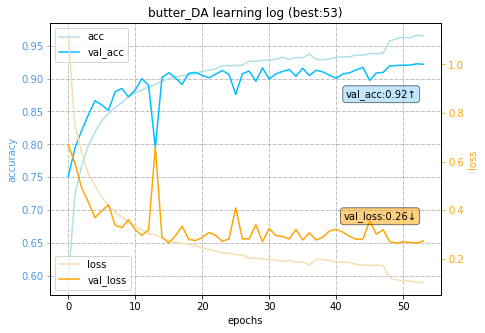

In [22]:
classifier.plot_learning()

In [15]:
classifier.load("models\\CNN_final_DA_butter_92.hdf5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [17]:
classifier.save_as_keras_model()

In [7]:
classifier.save_as_tflite(keras_model_path="models\\CNN_final_DA_butter_92.hdf5")

In [ ]:
val_output_tensors, val_predictions, val_true = classifier.test(X_val,Y_val)

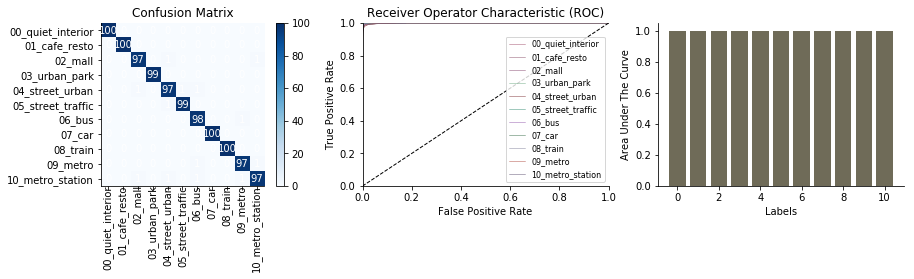

In [24]:
classifier.analysis(val_output_tensors, val_predictions, val_true)

## EVALUATION
### Buenos Aires Set

In [ ]:
tools.dataset_feature_extraction(
    source_dir      = "J:\\DataOffline\\Datasets\\BA_EVALUATION_SET\\Scenes_ORIGINAL",
    destination_dir = "J:\\DataOffline\\Datasets\\BA_EVALUATION_SET\\Spectrograms_MEL",
    feature_type    = 'mel_specs'
)

In [26]:
ev_dataset = tools.Dataset(
    name         = "BA Evaluation Dataset",
    features_dir = "J:\\DataOffline\\Datasets\\BA_EVALUATION_SET\\Spectrograms_MEL",
    xy_dir       = "J:\\DataOffline\\Datasets\\TEMP_EVAL",
)

BA Evaluation Dataset created!


min: 00:11:14
avg: 00:16:08
max: 00:20:27


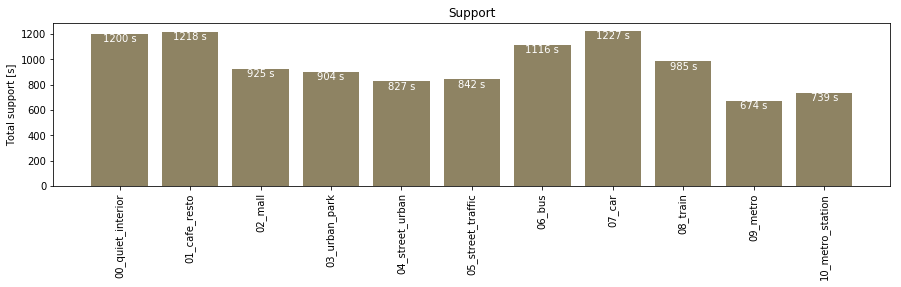

In [27]:
tools.duration_support(ev_dataset.features_dir)

In [28]:
ev_dataset.compile_XY(split=False)

Total Classes:   11
Dataset Compiled                                                                         


In [29]:
X_eval, Y_eval = ev_dataset.load_XY(is_split=False,normalize=True)

X: (7165, 128, 128, 1)
Y: (7165, 11)
Dataset Loaded!


In [30]:
tools.visualize_mapping(evaluation_labels=ev_dataset.labels,model_labels=classifier.labels)

Evaluation Folders ------- >  Model Labels 
00_quiet_interior -------- > 00_quiet_interior
01_cafe_resto ------------ > 01_cafe_resto
02_mall ------------------ > 02_mall
03_urban_park ------------ > 03_urban_park
04_street_urban ---------- > 04_street_urban
05_street_traffic -------- > 05_street_traffic
06_bus ------------------- > 06_bus
07_car ------------------- > 07_car
08_train ----------------- > 08_train
09_metro ----------------- > 09_metro
10_metro_station --------- > 10_metro_station


In [31]:
ev_output_tensors, ev_predictions, ev_true = classifier.test(X_eval,Y_eval)

Accuracy: 57.24%                                         
                   precision    recall  f1-score   support

00_quiet_interior       0.66      0.94      0.77       807
    01_cafe_resto       0.61      0.63      0.62       819
          02_mall       0.65      0.52      0.58       622
    03_urban_park       0.71      0.63      0.66       608
  04_street_urban       0.73      0.37      0.49       556
05_street_traffic       0.94      0.43      0.59       566
           06_bus       0.49      0.72      0.58       750
           07_car       0.78      0.83      0.80       825
         08_train       0.35      0.08      0.14       662
         09_metro       0.21      0.54      0.30       453
 10_metro_station       0.51      0.31      0.39       497

        micro avg       0.57      0.57      0.57      7165
        macro avg       0.60      0.54      0.54      7165
     weighted avg       0.61      0.57      0.56      7165



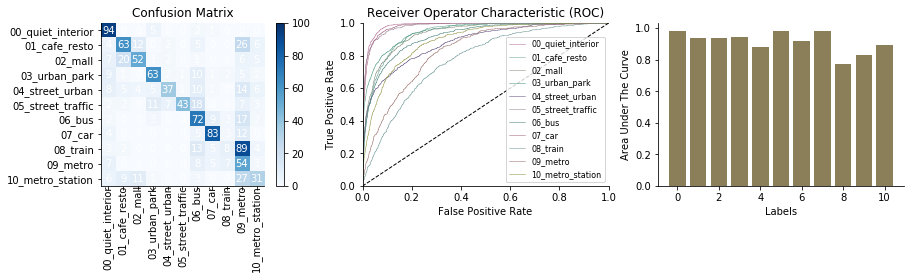

In [32]:
classifier.analysis(ev_output_tensors, ev_predictions, ev_true)

In [ ]:
classifier.audio_predictor(
    evaluation_dir= "J:\\DataOffline\\Datasets\\BA_EVALUATION_SET\\Scenes_ORIGINAL",
    feature_type = 'mel_specs',
    normalize    = True,
)